<a href="https://colab.research.google.com/github/Hardik-S/3-and-7/blob/master/Why_3_was_afraid_of_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Why 3 was afraid of 7.
###This program is built to differentiate between 3s and 7s using resnet18.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [50]:
from fastai.vision import *
from fastai.metrics import error_rate

This program is built to differentiate between 3s and 7s


In [0]:
bs = 64 # set batch size = 64

In [52]:
path = untar_data("http://files.fast.ai/data/examples/mnist_sample"); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
path_labels = path/'labels'
path_train = path/'train'
path_valid = path/'valid'

In [0]:
transformations = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms = transformations, size = 26 )

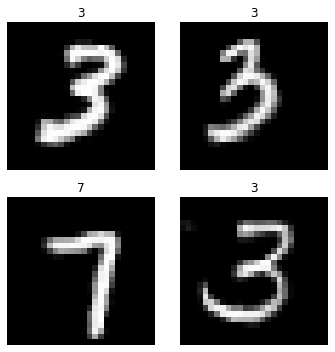

In [55]:
data.show_batch(rows=2, coloumns=2, figsize=(5,5))

In [56]:
doc(cnn_learner)

In [0]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy,error_rate])


In [58]:
myEpochs = 1
learner.fit(myEpochs)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.192089,0.091676,0.964181,0.035819,00:16


In [59]:
learner.fit_one_cycle(myEpochs)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.128251,0.055523,0.983317,0.016683,00:16


In [0]:
learner.save('trial-1')

##Further Possible Refinement

In [65]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

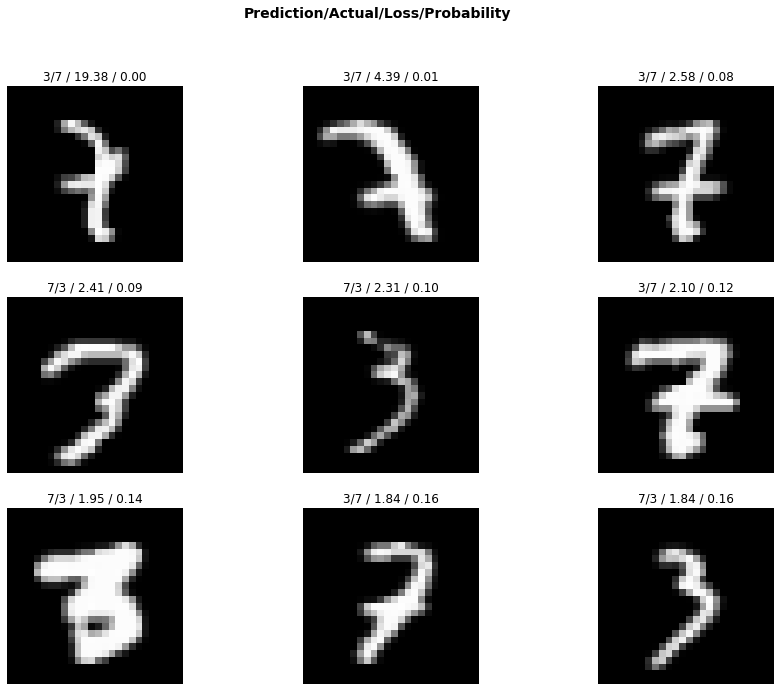

In [66]:
interp.plot_top_losses(9, figsize=(15,11))

These were the worst losses of the data set where the algorithm predicted incorrectly. Format is (predicted, actual, predicted probability, actual probability)

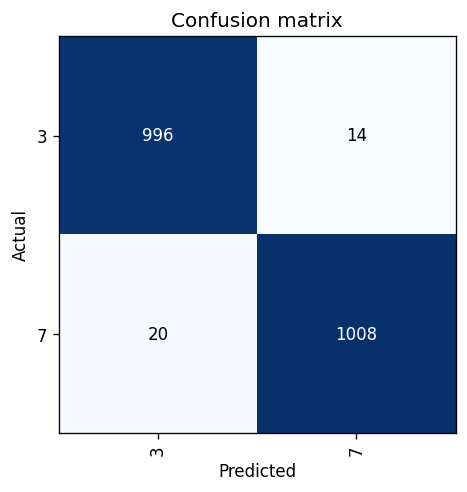

In [70]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

7s were predicted incorrectly more often than 3s.

In [71]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


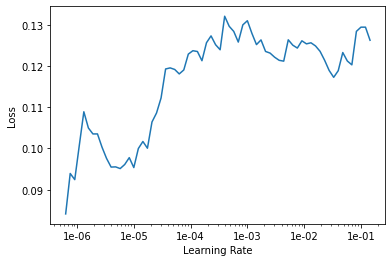

In [72]:
learner.recorder.plot()

From this, we can see that there isn't really a large enough "non-fingerprint" area to further refine the algorithm from, 1e-05 seems to be the most stable, however, considering that the data already achieved less than a 5% error rate, this project is considered done here.

##Results

In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms = transformations, size = 28)

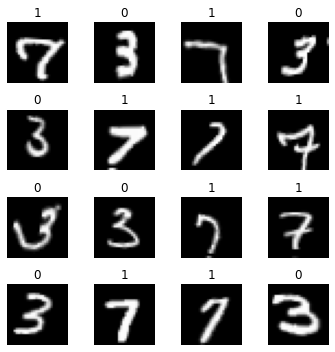

In [63]:
data.show_batch(rows=4, coloumns=4, figsize=(5,5))